<a href="https://colab.research.google.com/github/sangwainupur/Neural-Network-from-scratch/blob/main/Neural_network_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt

#print(plt.__version__)
print(np.__version__)

1.23.5


In [ ]:
pip install nnfs

In [ ]:
inputs = np.array ([1, 2, 3])
weights = np.array([0.2, 0.8, -0.5])
bias = 2
output = np.dot(weights, inputs) + bias
print(output)

2.3


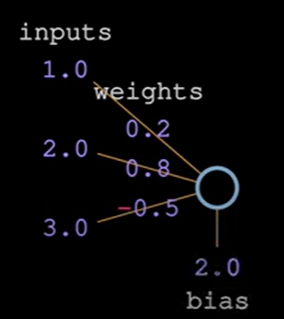

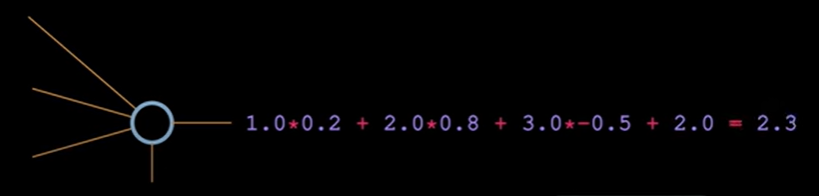

In [ ]:
import nnfs
np.random.seed(0)
from nnfs.datasets import spiral_data
nnfs.init()
'''
X= [[1, 2, 3, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, 2.7, 3.3, -0.8]]

X, y = spiral_data(100, 3)
'''
class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))
  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLU:
  def forward(self, inputs):
    self.output = np.maximum(0, inputs)

class Activation_Softmax:
  def forward(self, inputs):
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims = True))
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims = True)
    self.output = probabilities

X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])
#layer1 = Layer_Dense(2, 5)
#activation1 = Activation_ReLU()
#layer2 = Layer_Dense(5, 2)

#layer1.forward(X)
#activation1.forward(layer1.output)
#print(activation1.output)
#layer2.forward(layer1.output)
#print(layer1.output)

[[0.33333334 0.33333334 0.33333334]
 [0.33331734 0.3333183  0.33336434]
 [0.3332888  0.33329153 0.33341965]
 [0.33325943 0.33326396 0.33347666]
 [0.33323312 0.33323926 0.33352762]]


Why do we use activation functions

In [ ]:
#Sets a defaultdatatype in numpy

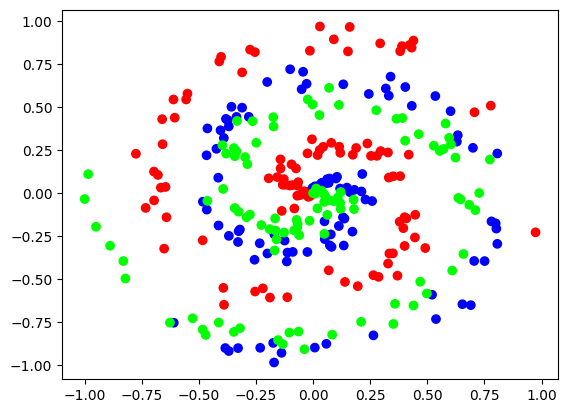

In [ ]:
'''N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
  '''
def create_data(points, classes):
  X = np.zeros((points*classes, 2))
  y = np.zeros(points*classes, dtype='uint8')
  for j in range(classes):
    ix = range(points*j,points*(j+1))
    r = np.linspace(0.0,1,points)
    t = np.linspace(j*4,(j+1)*4,points) + np.random.randn(points)*0.2
    X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
    y[ix] = j
  return X, y

X, y = create_data(100, 3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg")
plt.show()

Softmax activation function

ReLU - negative values==0, so difficult to find probability

In [ ]:
import math
layer_outputs = [4.8, 1.21, 2.385]
E = math.e
'''
exp_values =[]
for output in layer_outputs:
  exp_values.append(E**output)

print(exp_values)

norm_base = sum(exp_values)
norm_values = []

for value in exp_values:
  norm_values.append(value/norm_base)
'''
exp_values = np.exp(layer_outputs)
norm_values = exp_values / np.sum(exp_values)
print(norm_values) #returns normalized values
print(sum(norm_values))
norm_values = exp_values/ np.sum(exp_values)

[0.89528266 0.02470831 0.08000903]
0.9999999999999999


Input -> Exponentiate -> Normalize -> Output

Exponentiate + Normalize = Softmax

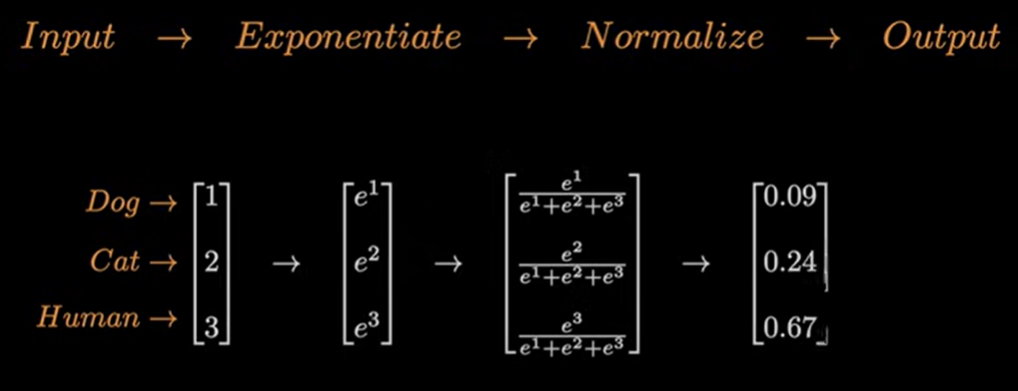

In [ ]:
#axis=0 -> sum of columns, axis=1->sum of rows